# Análisis y visualización de datos abiertos con python
# Graficación y visualización de datos

Para la parte teórica de este tutorial vean la presentación de [Teoría de la
Visualización de datos](https://docs.google.com/presentation/d/18irBZ2lz2gkI-0qw_rukGj0sLBvFVj9P7z9Cq5PjAKI/edit?usp=sharing)


Cargar los datos, usaremos el pickle que ya incluye las configuraciones de tipos de datos y categorías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/MFC_ActualizacionNov2022_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df


,Panteón_origen,Estatus_FC,Fecha_inhumación,Fecha_inhumación_diasemana,Fecha_inhumación_semanaaño,Fecha_defunción,Fecha_defunción_diasemana,Fecha_defunción_semanaaño,Restos_tipo,Sexo,...,Primer_apellido,Segundo_Apellido,Nombres,Nombre_completo,Institución_origen,Tipo_institución_origen,Rdoc,Marca_temporal,Marca_temporal_diasemana,Marca_temporal_semanaaño
ID,,,,,,,,,,,,,,,,,,,,,
XX-P001,Panteón Civil de Dolores,Inhumación,2019-01-30,2,5,2018-03-04,6.0,9.0,Restos cremados,Masculino,...,,,,,Universidad Westhill - Facultad De Medicina,Escuela privada,Sí,2020-03-23 00:00:00.000,0,13
XX-P002,Panteón Civil de Dolores,Inhumación,2019-01-26,5,4,2018-12-12,2.0,50.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-03-23 00:00:00.000,0,13
XX-P003,Panteón Civil de Dolores,Inhumación,2019-01-26,5,4,2018-12-13,3.0,50.0,Cadáver,Masculino,...,Cruz,Lucero,Alberto,Alberto Cruz Lucero,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-03-23 00:00:00.000,0,13
XX-P004,Panteón Civil de Dolores,Inhumación,2019-01-26,5,4,2018-12-14,4.0,50.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-03-23 00:00:00.000,0,13
XX-P005,Panteón Civil de Dolores,Inhumación,2019-01-26,5,4,2018-12-18,1.0,51.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-03-23 00:00:00.000,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XX-P996,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,NaT,NaN,NaN,Cadáver,Masculino,...,Flores,Rosette,Sergio,Sergio Flores Rosette,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública,Sí,2020-04-06 21:19:52.451,0,15
XX-P997,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2017-10-27,4.0,43.0,Cadáver,Masculino,...,Juarez,Chavez,Juan Carlos,Juan Carlos Juarez Chavez,Universidad Nacional Autonoma De Mexico - Facu...,Escuela pública,Sí,2020-04-06 21:22:53.304,0,15
XX-P998,Panteón Civil de Dolores,Inhumación,2018-09-01,5,35,2018-08-18,5.0,33.0,Cadáver,Masculino,...,,,,,Instituto De Ciencias Forenses - Tribunal Supe...,Institución judicial,Sí,2020-04-06 21:30:12.169,0,15


Revisemos los tipos de datos

In [3]:
df.dtypes

Panteón_origen                      category
Estatus_FC                          category
Fecha_inhumación              datetime64[ns]
Fecha_inhumación_diasemana             int64
Fecha_inhumación_semanaaño             int64
Fecha_defunción               datetime64[ns]
Fecha_defunción_diasemana            float64
Fecha_defunción_semanaaño            float64
Restos_tipo                         category
Sexo                                category
Edad                                  object
Edad_años                            float64
Conocido_Desconocido                category
Primer_apellido                       object
Segundo_Apellido                      object
Nombres                               object
Nombre_completo                       object
Institución_origen                    object
Tipo_institución_origen               object
Rdoc                                  object
Marca_temporal                datetime64[ns]
Marca_temporal_diasemana               int64
Marca_temp

## Pandas plot

"""Explica que es matplotlib"""

La forma más facíl de gráficar un dataframe es con el comando `.plot()` de pandas.

En general el comando plot toma una serie o dataframe, un tipo de gráfico, una serie de intruccionessobre ejes, etiquetas etc y regresa un objeto `matplotlib.axes.Axes`. Además, es posible pasarle argumentos específicos de matplotlib para mejorar la gráfica. Les recomiendo ver la [documentación de la función](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Loas tipos de gráficas que se pueden hacer con este comando son:
* `line` : line plot (default)
* `bar` : vertical bar plot
* `barh` : horizontal bar plot
* `hist` : histogram
* `box` : boxplot
* `kde` : Kernel Density Estimation plot
* `density` : same as `kde`
* `area` : area plot
* `pie` : pie plot
* `scatter` : scatter plot (DataFrame only)
* `hexbin` : hexbin plot (DataFrame only)

## Lineas

La opción por default de graficación de pandas es lineas

Por default, esta función coloca el indice en el eje x y los valores númericos de la función en el eje y

<AxesSubplot: xlabel='ID'>

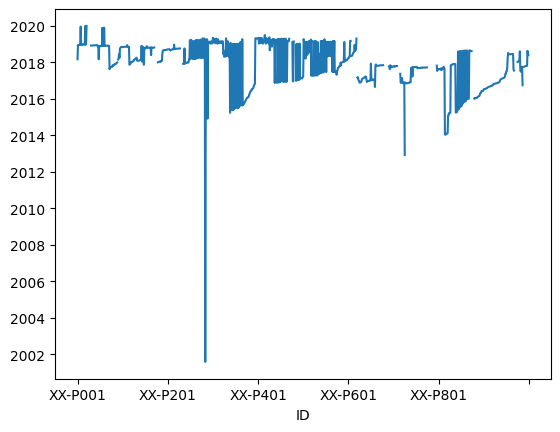

In [5]:
df['Fecha_defunción'].plot()

Si le damos dos columnas graficará cada una en una serie, las columnas debén de ser comparables

<AxesSubplot: xlabel='ID'>

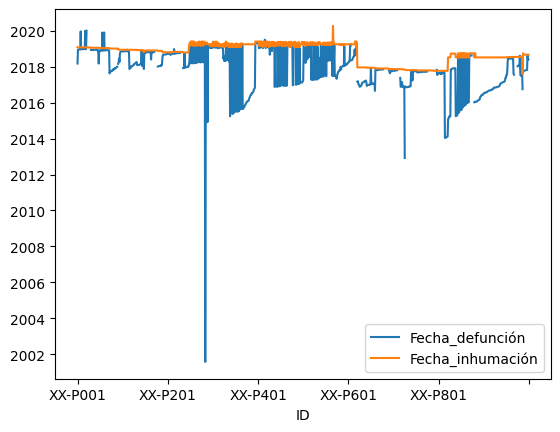

In [6]:
df[['Fecha_defunción','Fecha_inhumación']].plot()

## Scatterplot

Podemos cambiar el tipo de gráfica con la opción `kind`o especificandola como función.

Por ejemplo, para una gráfica de puntos scatter las opciones son:
* `DataFrame.plot(kind='scatter')`
* `DataFrame.plot.scatter()`

Para este gráfico es necesario marcar las columnas que se usarán como `x` y `y`

<AxesSubplot: xlabel='Fecha_defunción', ylabel='Fecha_inhumación'>

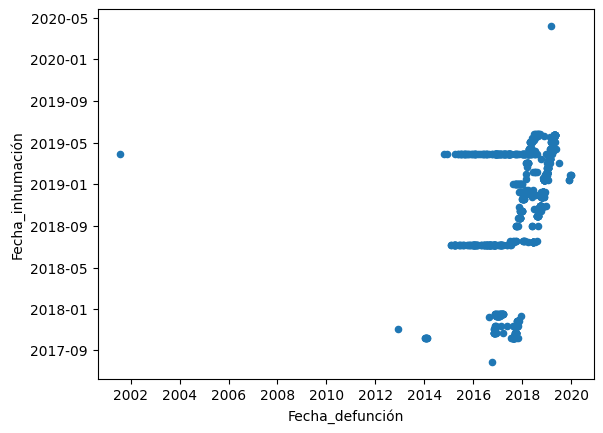

In [9]:
df.plot.scatter(x='Fecha_defunción', y='Fecha_inhumación')

## Barras

Pandas puede realizar gráficas de barras, en este caso primero calcularemos el número de tipo de restos.



<AxesSubplot: >

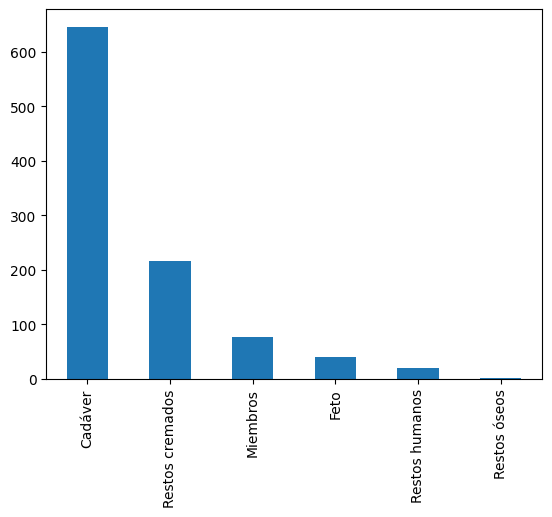

In [12]:
df['Restos_tipo'].value_counts().plot(kind='bar')

<AxesSubplot: >

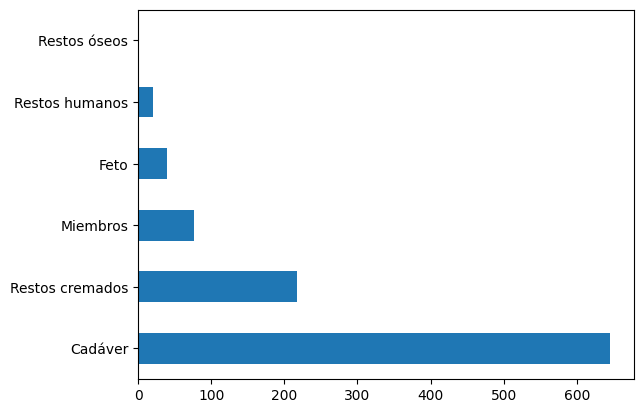

In [13]:
df['Restos_tipo'].value_counts().plot(kind='barh')

In [26]:
df_tipo_sexo = pd.pivot_table(df, values='Conocido_Desconocido', index='Restos_tipo', columns='Sexo', aggfunc='count')
df_tipo_sexo = df_tipo_sexo[['Masculino','Femenino','Indeterminado']]
df_tipo_sexo

Sexo,Masculino,Femenino,Indeterminado
Restos_tipo,,,
Cadáver,565,80,1
Restos humanos,12,6,2
Restos cremados,157,60,0
Restos óseos,0,0,1
Feto,26,8,6
Miembros,58,15,3


<AxesSubplot: xlabel='Restos_tipo'>

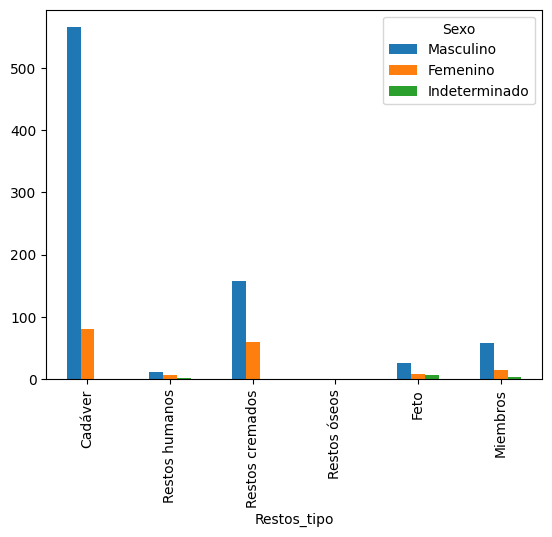

In [27]:
df_tipo_sexo.plot(kind='bar')

<AxesSubplot: xlabel='Restos_tipo'>

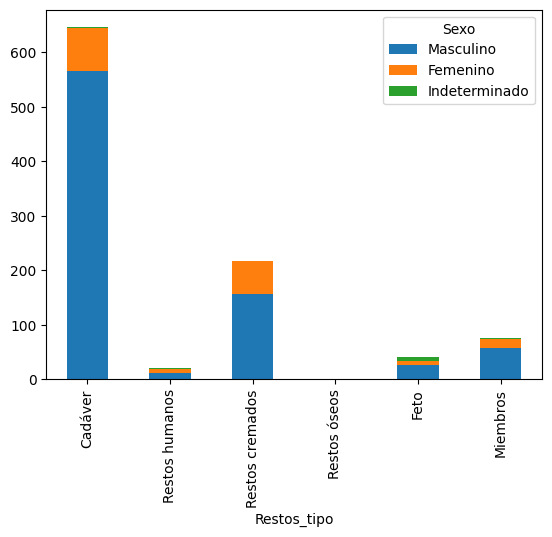

In [28]:
df_tipo_sexo.plot(kind='bar', stacked=True)

## Histogramas

<AxesSubplot: ylabel='Frequency'>

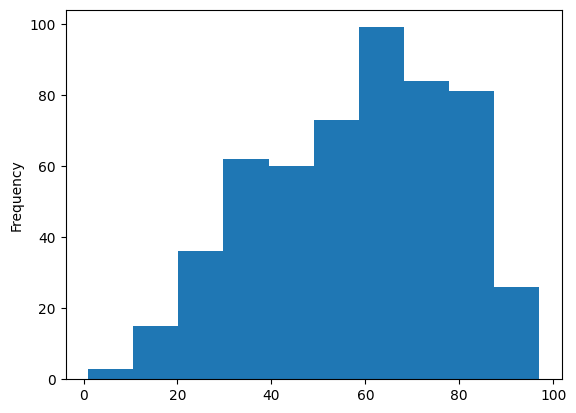

In [34]:
df['Edad_años'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

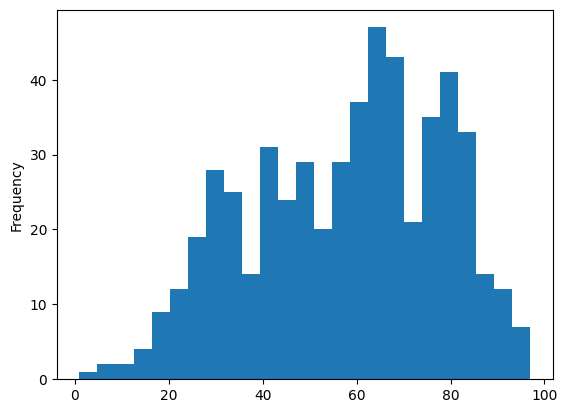

In [36]:
df['Edad_años'].plot.hist(bins=25)

## KDE

<AxesSubplot: ylabel='Density'>

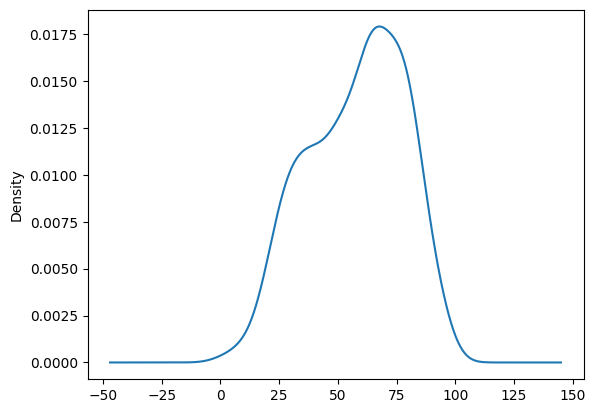

In [38]:
df['Edad_años'].plot(kind='kde')